<a href="https://colab.research.google.com/github/Yolde/software_gap_analysis_tool/blob/main/Software_Gap_Analysis_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Step 1: Define the existing tools and their attributes
existing_tools_data = {
    "Tool": ["Tool A", "Tool B", "Tool C"],
    "Feature Completeness": [8, 6, 7],
    "Usage Metrics (hours/week)": [15, 20, 12],
    "User Satisfaction (1-10)": [7, 5, 8],
    "Cost ($)": [1000, 1200, 900]
}


In [8]:
existing_tools_df = pd.DataFrame(existing_tools_data)

# Step 2: Define desired criteria for gap analysis
default_criteria = {
    "Feature Completeness": 10,
    "Usage Metrics (hours/week)": 25,
    "User Satisfaction (1-10)": 9,
    "Cost ($)": 1000
}


In [9]:
def calculate_gaps(existing, desired):
    gaps = desired - existing
    return gaps

def perform_gap_analysis(desired_criteria):
    desired_df = pd.DataFrame([desired_criteria])
    gap_analysis = existing_tools_df.iloc[:, 1:].apply(lambda col: calculate_gaps(col, desired_df[col.name].iloc[0]))
    result_df = pd.concat([existing_tools_df, gap_analysis.rename(columns=lambda x: f"Gap in {x}" )], axis=1)
    return result_df, gap_analysis

def visualize_gaps(gap_analysis):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, tool in enumerate(existing_tools_df["Tool"]):
        gaps = gap_analysis.iloc[i]
        ax.bar([x + i * 0.2 for x in range(len(gaps))], gaps, width=0.2, label=tool)

In [11]:
    ax.set_xticks(range(len(gap_analysis.columns)))
    ax.set_xticklabels(gap_analysis.columns, rotation=45, ha="right")
    ax.set_title("Gap Analysis for Existing Tools")
    ax.set_ylabel("Gap Value")
    ax.legend()
    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

In [12]:
# Step 5: Estimate demand for new tools based on qualitative evaluation
def estimate_demand(gap_df):
    demand_score = gap_df[["Gap in Feature Completeness", "Gap in Usage Metrics (hours/week)", "Gap in User Satisfaction (1-10)"]].mean(axis=1)
    return demand_score

def run_tool(feature_completeness, usage_metrics, user_satisfaction, cost):
    desired_criteria = {
        "Feature Completeness": feature_completeness,
        "Usage Metrics (hours/week)": usage_metrics,
        "User Satisfaction (1-10)": user_satisfaction,
        "Cost ($)": cost
    }

    result_df, gap_analysis = perform_gap_analysis(desired_criteria)
    display(result_df)
    visualize_gaps(gap_analysis)

    result_df["Estimated Demand for New Tools"] = estimate_demand(result_df)
    display(result_df[["Tool", "Estimated Demand for New Tools"]])

    highest_demand_tool = result_df.loc[result_df["Estimated Demand for New Tools"].idxmax()]
    print(f"\nTool with Highest Demand for Replacement: {highest_demand_tool['Tool']}\n")


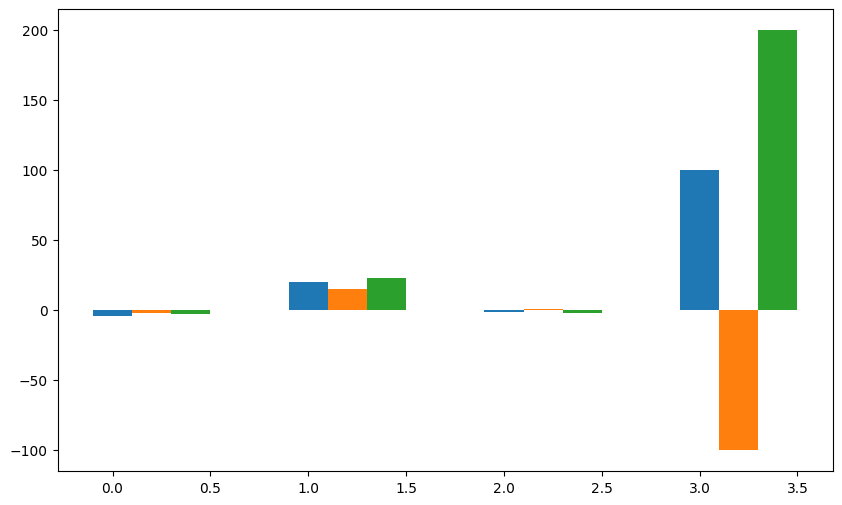

In [14]:
# User Interface
header = widgets.HTML("""<h1 style='color: #2C3E50; text-align: center;'>Gap Analysis Tool</h1>""")
description = widgets.HTML("""<p style='color: #34495E; text-align: center;'>Use the sliders below to adjust criteria and perform gap analysis on existing tools.</p>""")

feature_completeness_input = widgets.IntSlider(
    value=default_criteria["Feature Completeness"],
    min=0,
    max=10,
    description="<b>Feature Completeness</b>",
    style={'description_width': 'initial'},
    continuous_update=False
)

usage_metrics_input = widgets.IntSlider(
    value=default_criteria["Usage Metrics (hours/week)"],
    min=0,
    max=50,
    description="<b>Usage Metrics</b>",
    style={'description_width': 'initial'},
    continuous_update=False
)

user_satisfaction_input = widgets.IntSlider(
    value=default_criteria["User Satisfaction (1-10)"],
    min=0,
    max=10,
    description="<b>User Satisfaction</b>",
    style={'description_width': 'initial'},
    continuous_update=False
)

cost_input = widgets.IntSlider(
    value=default_criteria["Cost ($)"],
    min=500,
    max=2000,
    step=100,
    description="<b>Cost ($)</b>",
    style={'description_width': 'initial'},
    continuous_update=False
)

run_button = widgets.Button(
    description="Run Gap Analysis",
    button_style="success",
    tooltip="Click to run the gap analysis",
    icon="play"
)
output = widgets.Output()

def on_run_button_clicked(b):
    with output:
        clear_output()
        run_tool(
            feature_completeness_input.value,
            usage_metrics_input.value,
            user_satisfaction_input.value,
            cost_input.value
        )

run_button.on_click(on_run_button_clicked)

ui = widgets.VBox([
    header,
    description,
    feature_completeness_input,
    usage_metrics_input,
    user_satisfaction_input,
    cost_input,
    run_button,
    output
])

display(ui)